### Imports necessary packages

In [1]:
import json
from collections import Counter
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Specifies a path to Re-TACRED dataset

In [2]:
tacred_dir = Path('../../etc/datasets/tacred')

### Implements a utility functions

In [3]:
def display_df(df: pd.DataFrame, desc: str = ""):
    """ Displays given dataframe """

    if desc:
        print(desc)

    df = df.style.set_properties(**{'text-align': 'left'})
    display(df)


def label_distribution(path_to_labels: Path):
    """ Returns dataframe with labels distribution of given dataset """

    with path_to_labels.open('r') as file:
        labels = file.readlines()

    labels = tuple(map(lambda s: s.strip(), labels))
    c = Counter(labels).most_common()

    data = {
        "relations": tuple(map(lambda tmp: tmp[0], c)),
        "count": tuple(map(lambda tmp: tmp[1], c))
    }

    df = pd.DataFrame(data)

    return df


def ner_distribution(path_to_dataset: Path, title: str = ""):
    """ Returns dataframe with entity types distribution of given dataset """

    with path_to_dataset.open('r') as file:
        examples = json.load(file)

    subjects = tuple(map(lambda example: example['subj_type'], examples))
    objects = tuple(map(lambda example: example['obj_type'], examples))

    c = Counter(subjects)
    c.update(objects)
    c = c.most_common()

    data = {
        "ner types": tuple(map(lambda tmp: tmp[0], c)),
        "count": tuple(map(lambda tmp: tmp[1], c))
    }

    df = pd.DataFrame(data)

    plt.title(title)
    plt.bar(tuple(map(lambda tmp: tmp[0], c)), tuple(map(lambda tmp: tmp[1], c)))
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.show()

    return df


def length_distribution(path_to_dataset: Path, title: str = ""):
    """ Returns mean example length and other characteristic of given dataset """

    with path_to_dataset.open('r') as file:
        examples = json.load(file)

    lengths = tuple(map(lambda example: len(example['token']), examples))

    plt.title(title)
    plt.hist(lengths, bins=50)
    plt.xlabel("Length in words")
    plt.ylabel("Count")
    plt.show()

    return lengths


# 1. Labels distribution

In [4]:
train_labels = label_distribution(tacred_dir / "data/gold/train.gold")
display_df(train_labels.head(10), 'Re-TACRED: Train part')

print(f'The number of no_relation label: {train_labels["count"].iloc[0]}')
print(f'The number of other labels: {np.sum(train_labels["count"].iloc[1:])}')

Re-TACRED: Train part


,relations,count
0,no_relation,55112
1,per:title,2443
2,org:top_members/employees,1890
3,per:employee_of,1524
4,org:alternate_names,808
5,org:country_of_headquarters,468
6,per:countries_of_residence,445
7,per:age,390
8,org:city_of_headquarters,382
9,per:cities_of_residence,374


The number of no_relation label: 55112
The number of other labels: 13012


In [5]:
dev_labels = label_distribution(tacred_dir / "data/gold/dev.gold")
display_df(dev_labels.head(10), 'Re-TACRED: Developlment part')

print(f'The number of no_relation label: {dev_labels["count"].iloc[0]}')
print(f'The number of other labels: {np.sum(dev_labels["count"].iloc[1:])}')

Re-TACRED: Developlment part


,relations,count
0,no_relation,17195
1,per:title,919
2,org:top_members/employees,534
3,per:employee_of,375
4,org:alternate_names,338
5,per:age,243
6,per:countries_of_residence,226
7,per:origin,210
8,per:date_of_death,206
9,per:cities_of_residence,179


The number of no_relation label: 17195
The number of other labels: 5436


In [6]:
test_labels = label_distribution(tacred_dir / "data/gold/test.gold")
display_df(test_labels.head(10), 'Re-TACRED: Test part')

print(f'The number of no_relation label: {test_labels["count"].iloc[0]}')
print(f'The number of other labels: {np.sum(test_labels["count"].iloc[1:])}')

Re-TACRED: Test part


,relations,count
0,no_relation,12184
1,per:title,500
2,org:top_members/employees,346
3,per:employee_of,264
4,org:alternate_names,213
5,per:age,200
6,per:cities_of_residence,189
7,per:countries_of_residence,148
8,per:origin,132
9,org:country_of_headquarters,108


The number of no_relation label: 12184
The number of other labels: 3325


### Conclision 

There is a large disparity of labels in Re-TACRED. The number of no_relation label is 3-4 times more than number of other labels.

# 2. Length of examples

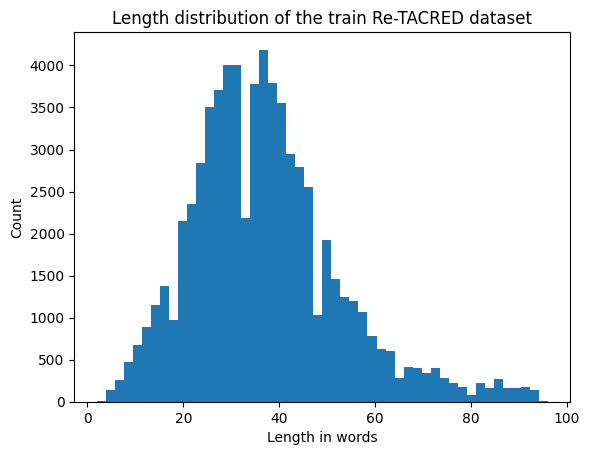

Mean length is 37.07
Std is 15.43


In [7]:
train_lengths = length_distribution(tacred_dir / "data/json/train.json", "Length distribution of the train Re-TACRED dataset")
print(f'Mean length is {np.mean(train_lengths):.2f}')
print(f'Std is {np.std(train_lengths):.2f}')

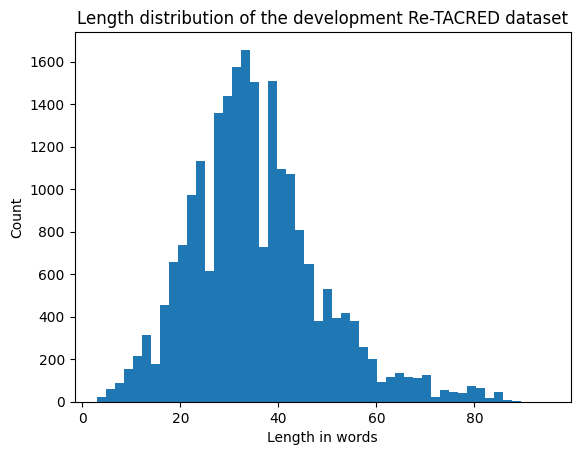

Mean length is 35.46
Std is 13.37


In [8]:
dev_lengths = length_distribution(tacred_dir / "data/json/dev_rev.json", "Length distribution of the development Re-TACRED dataset")
print(f'Mean length is {np.mean(dev_lengths):.2f}')
print(f'Std is {np.std(dev_lengths):.2f}')

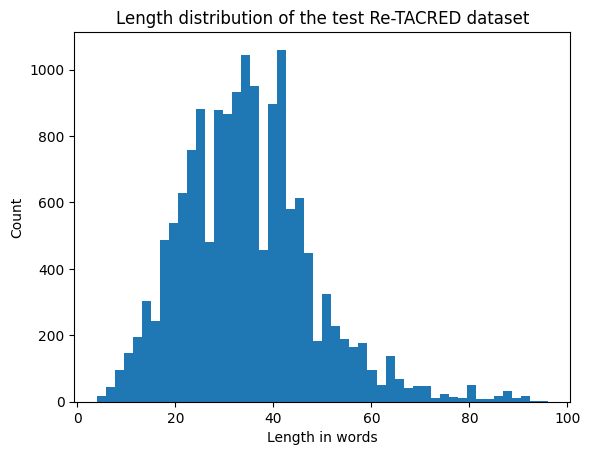

Mean length is 34.75
Std is 13.36


In [9]:
test_lengths = length_distribution(tacred_dir / "data/json/test_rev.json", "Length distribution of the test Re-TACRED dataset")
print(f'Mean length is {np.mean(test_lengths):.2f}')
print(f'Std is {np.std(test_lengths):.2f}')

### Conclusion:

All parts of Re-TACRED dataset have the same length distribution of their examples.

# Entity types distribution

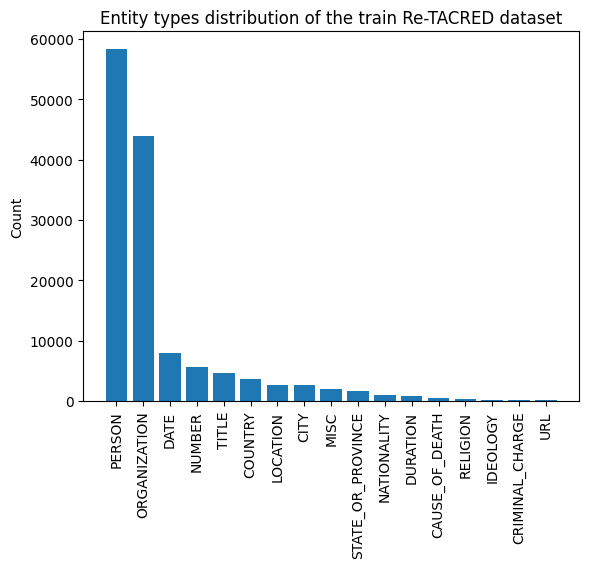

Re-TACRED: Train part


,ner types,count
0,PERSON,58303
1,ORGANIZATION,43945
2,DATE,8009
3,NUMBER,5643
4,TITLE,4621
5,COUNTRY,3679
6,LOCATION,2655
7,CITY,2628
8,MISC,1918
9,STATE_OR_PROVINCE,1601


In [10]:
train_ner = ner_distribution(tacred_dir / "data/json/train.json", "Entity types distribution of the train Re-TACRED dataset")
display_df(train_ner.head(10), 'Re-TACRED: Train part')

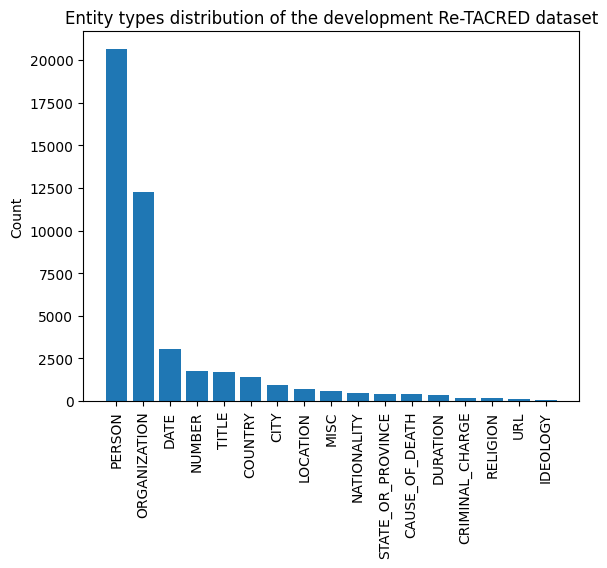

Re-TACRED: Development part


,ner types,count
0,PERSON,20644
1,ORGANIZATION,12272
2,DATE,3064
3,NUMBER,1742
4,TITLE,1701
5,COUNTRY,1434
6,CITY,951
7,LOCATION,677
8,MISC,600
9,NATIONALITY,495


In [11]:
dev_ner = ner_distribution(tacred_dir / "data/json/dev_rev.json", "Entity types distribution of the development Re-TACRED dataset")
display_df(dev_ner.head(10), 'Re-TACRED: Development part')

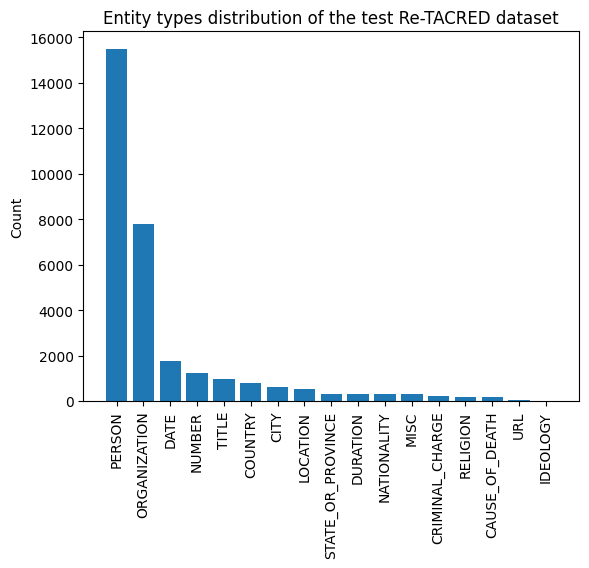

Re-TACRED: Test part


,ner types,count
0,PERSON,15486
1,ORGANIZATION,7781
2,DATE,1743
3,NUMBER,1250
4,TITLE,974
5,COUNTRY,778
6,CITY,634
7,LOCATION,539
8,STATE_OR_PROVINCE,320
9,DURATION,318


In [12]:
test_ner = ner_distribution(tacred_dir / "data/json/test_rev.json", "Entity types distribution of the test Re-TACRED dataset")
display_df(test_ner.head(10), 'Re-TACRED: Test part')

### Conclusion

All parts of Re-TACRED dataset have almost the same entity types distribution.